In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.drop(columns="car_ID", inplace=True)

In [4]:
df.shape

(205, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
(df.isna().sum() / df.shape[0]) * 100

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [8]:
df["symboling"] = df["symboling"].astype(str)

In [9]:
df["CarName"] = df['CarName'].str.split(' ', expand=True)[0]

In [10]:
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
df["CarName"] = df["CarName"].replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche",
                                 "toyouta":"toyota","vokswagen":"volkswagen","vw":"volkswagen"})

In [12]:
df["price_category"] = df["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")

In [13]:
col_numeric = list(df.select_dtypes(exclude="object"))

col_categorical = list(df.select_dtypes(include="object"))

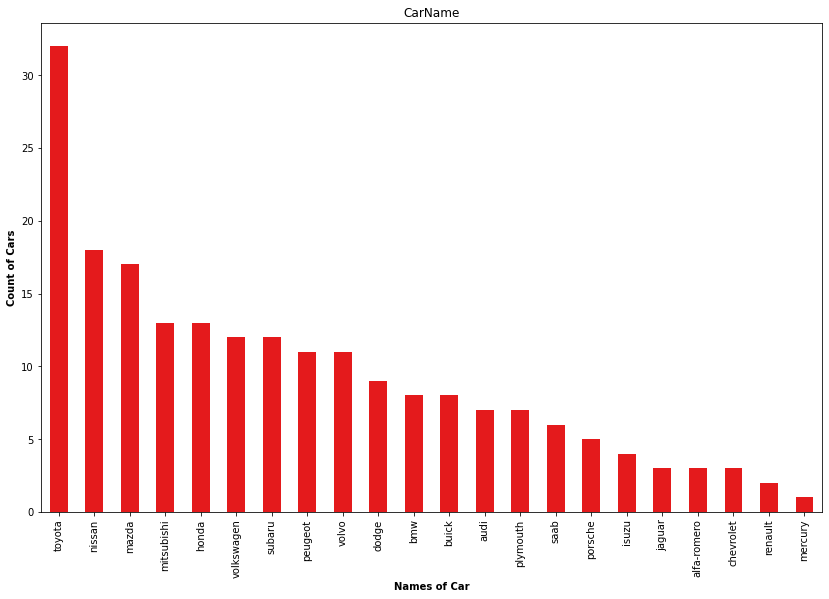

In [14]:
plt.rcParams['figure.figsize'] = [14,9]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

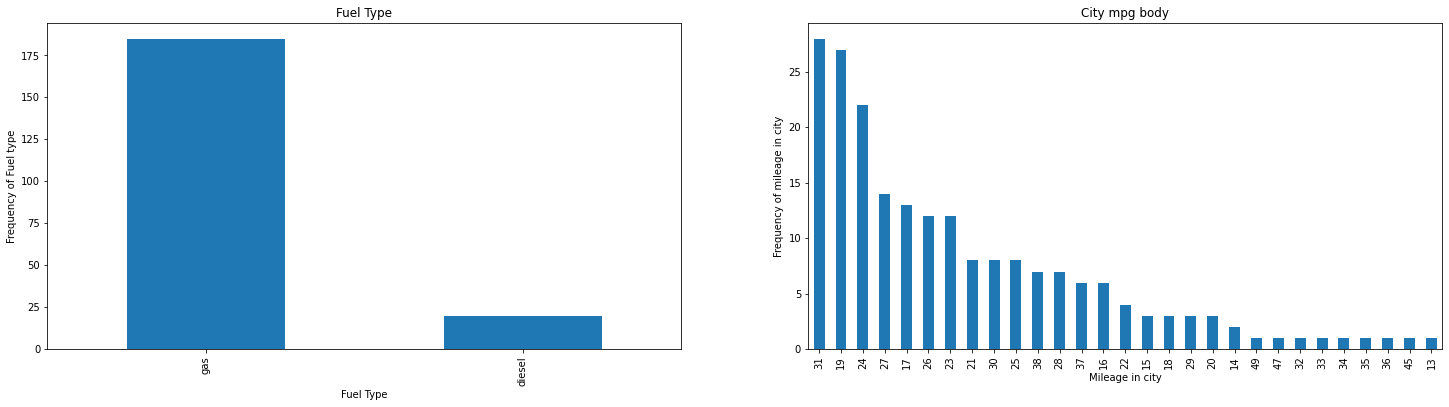

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,2,2)
plt1 = df['citympg'].value_counts().plot(kind='bar')
plt.title('City mpg body')
plt1.set(xlabel = 'Mileage in city', ylabel='Frequency of mileage in city')

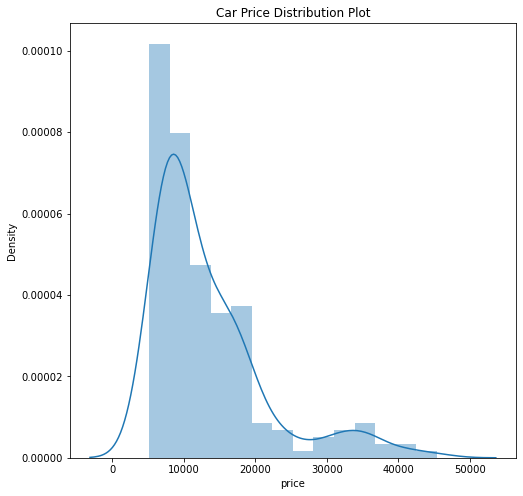

In [18]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

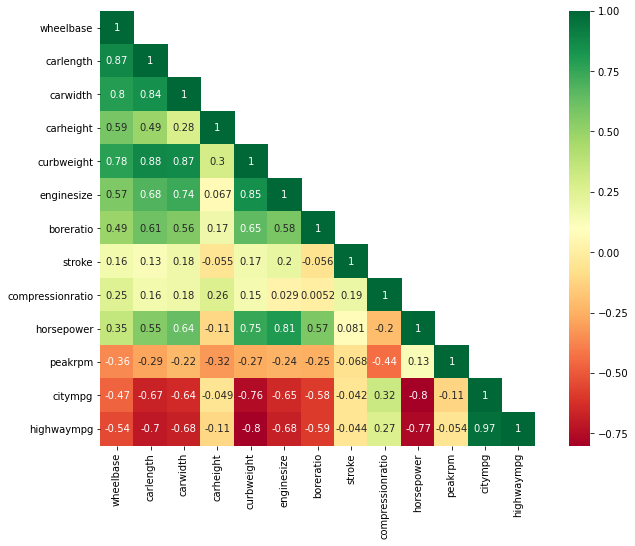

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="price").corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.drop(columns="price").corr(), k=1))
plt.show()

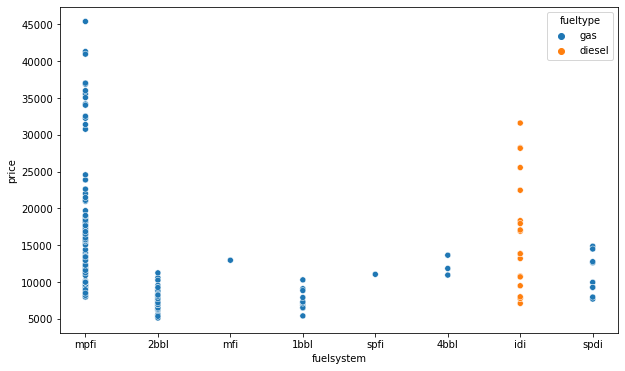

In [20]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

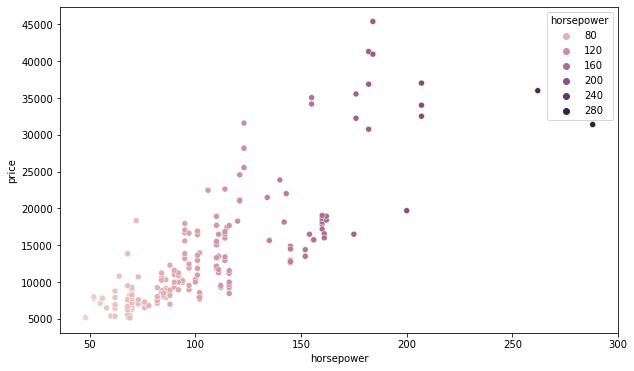

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'horsepower', data = df)
plt.show()

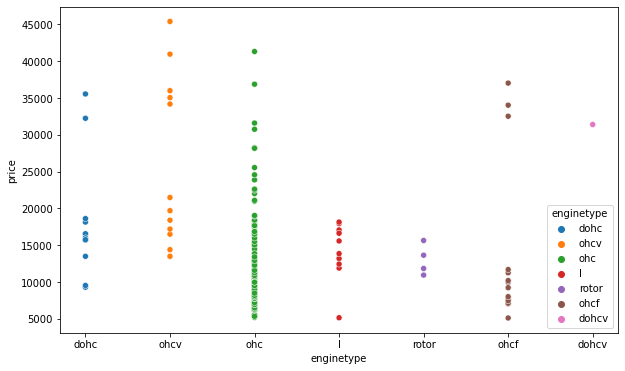

In [22]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'enginetype', y = 'price', hue = 'enginetype', data = df)
plt.show()

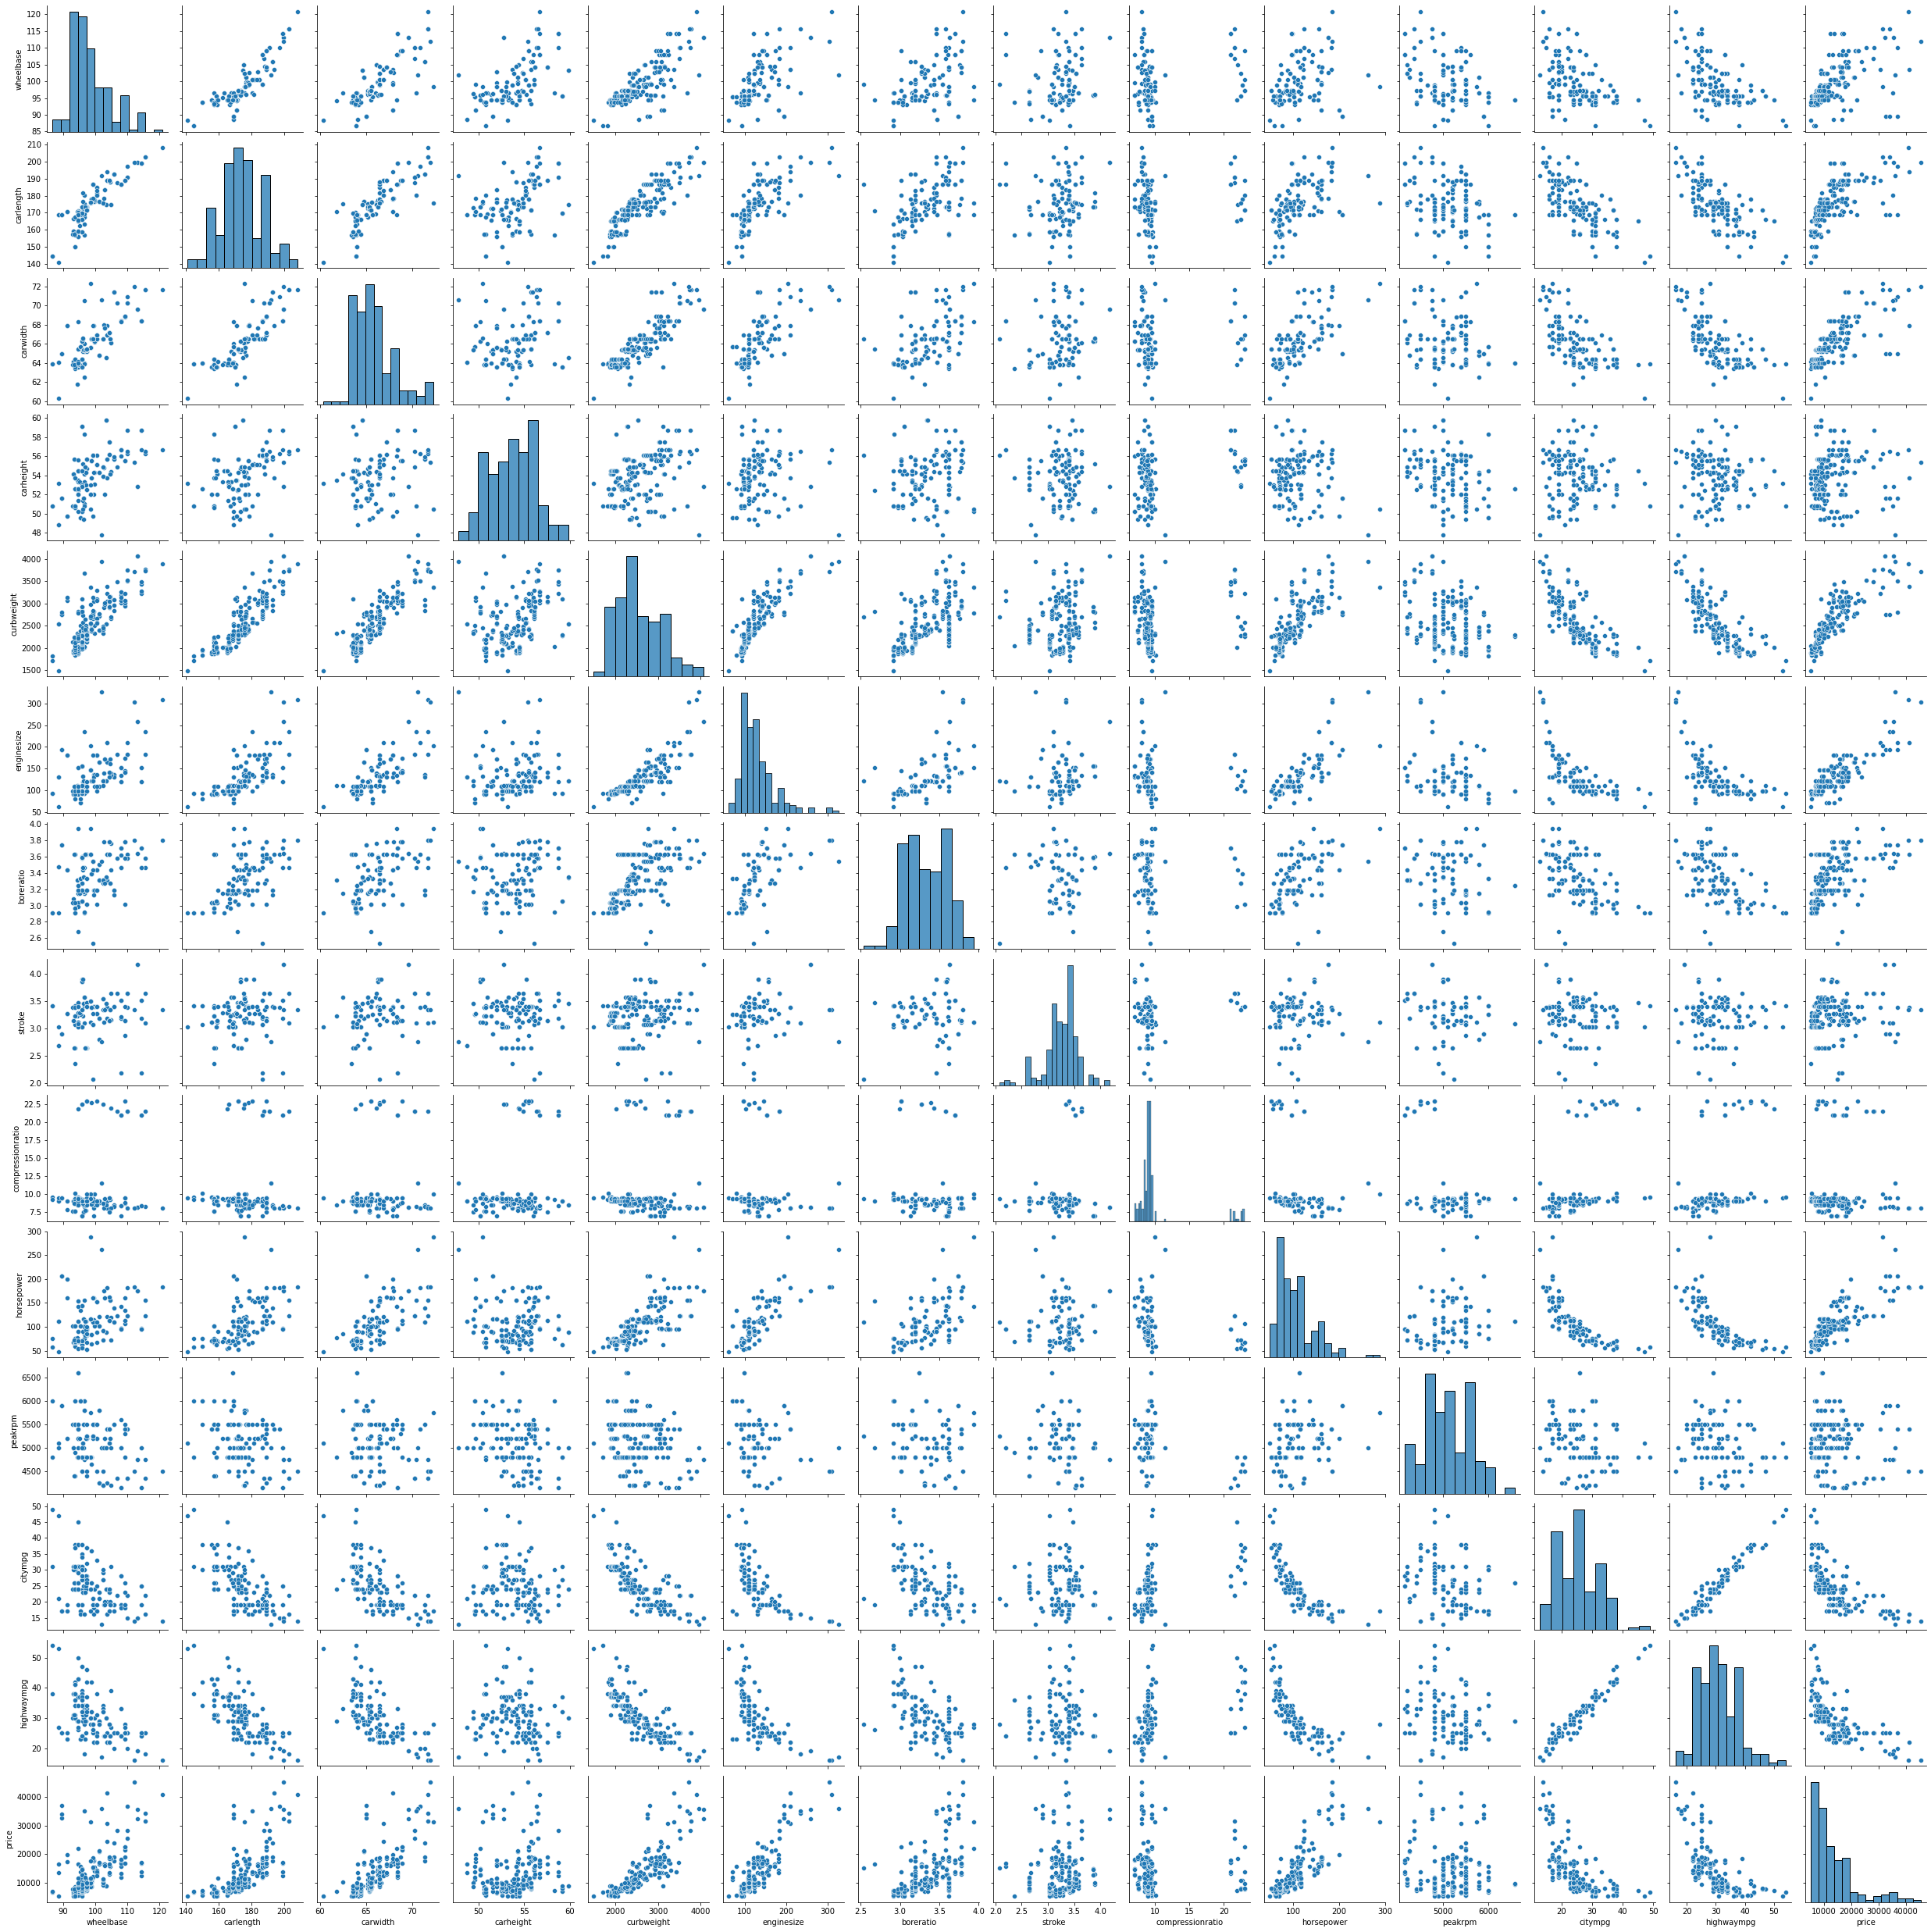

In [23]:
num_col = df.select_dtypes(exclude=['object']).columns
ax = sns.pairplot(df[num_col])

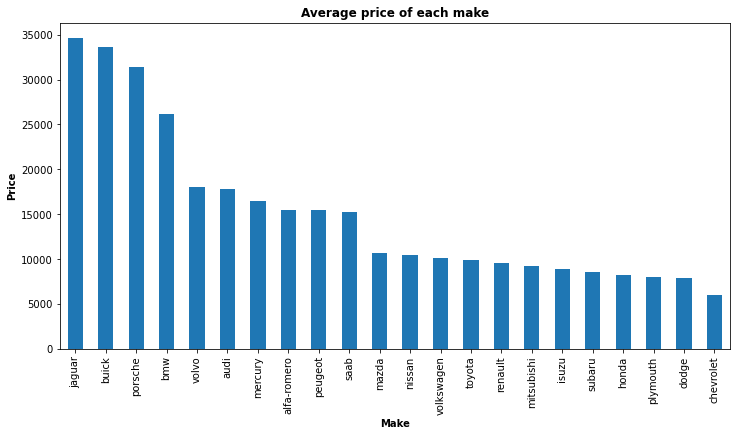

In [24]:
# average price of each make
df.groupby("CarName")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

In [25]:
le = LabelEncoder()

df_encoded = df.drop(columns=["price_category"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,5,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,0,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,1,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:

X = df_encoded.drop(columns="price")

y = df_encoded["price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9285496085050007


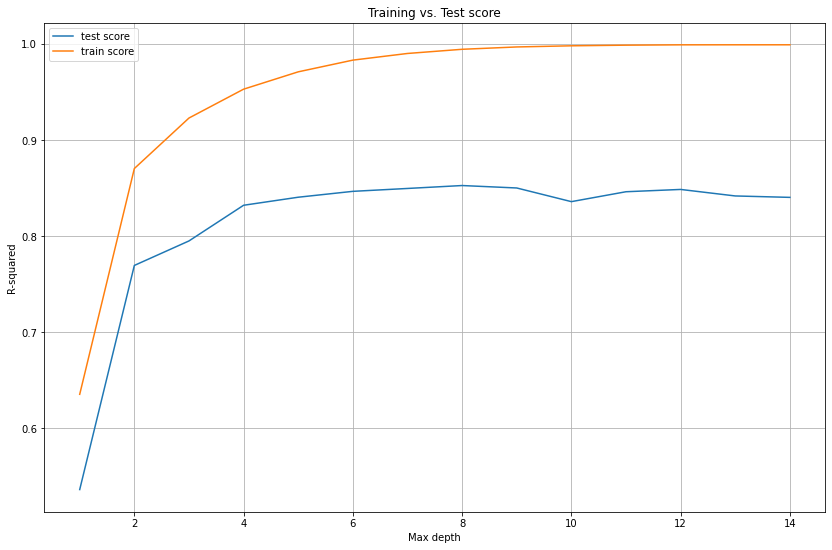

In [30]:
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

In [31]:
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9299577373480631
